# Version python pandas, numpy

In [1]:
import pandas as pd
import numpy as np

Colonne: index, Type: Quantitative Continue
  Moyenne: 499.5
  Médiane: 499.5
  Écart-type: 288.8194360957494
  Étendue: 999


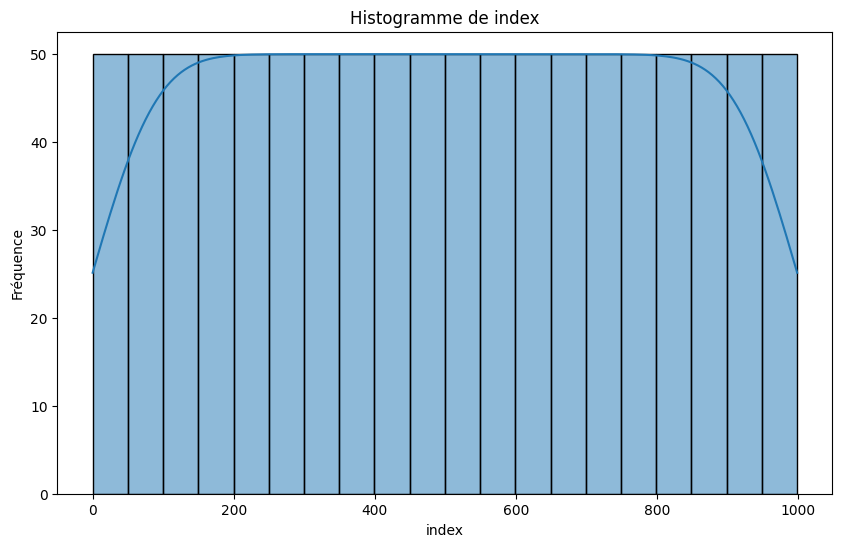

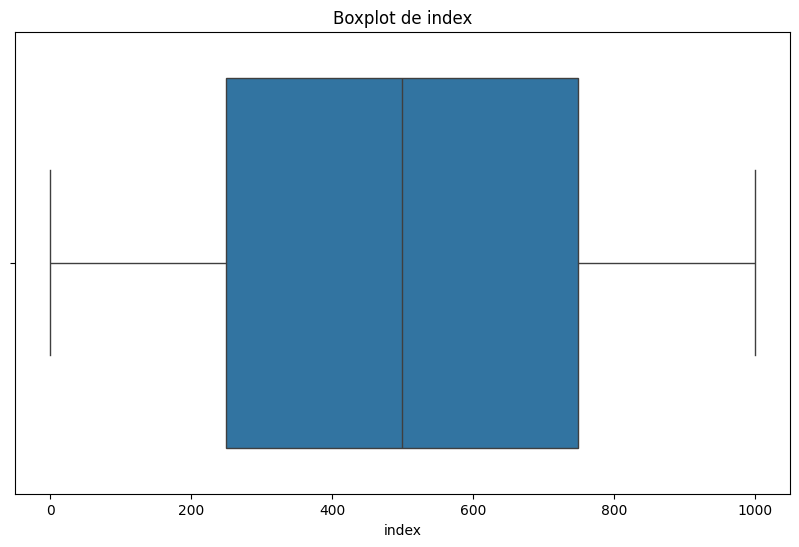

Colonne: math, Type: Quantitative Continue
  Moyenne: 6.54
  Médiane: 6.4
  Écart-type: 1.474562421308211
  Étendue: 7.7


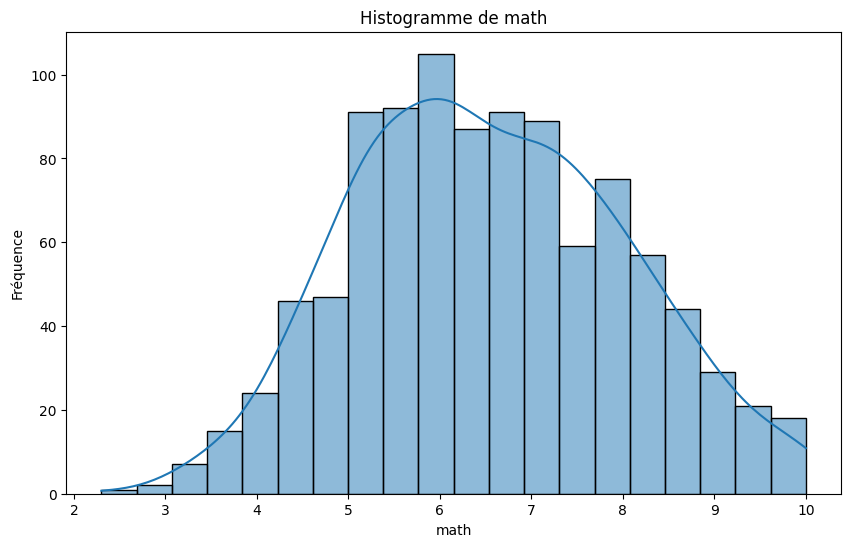

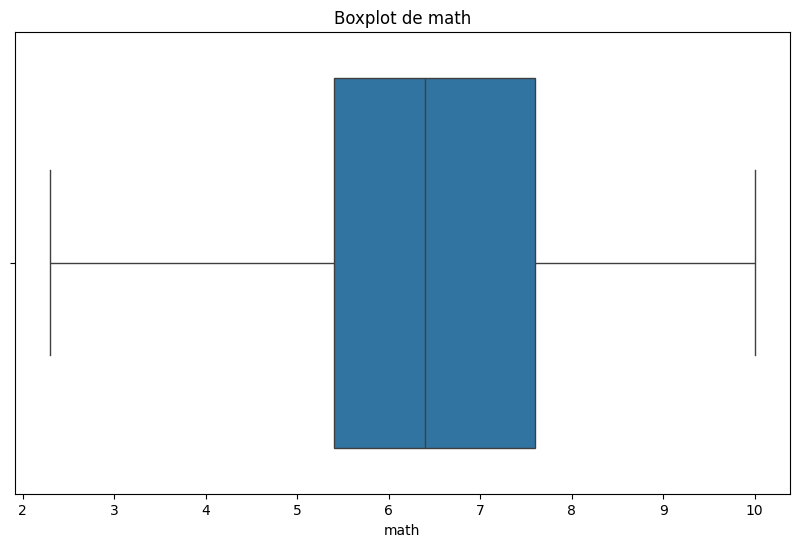

Colonne: eng, Type: Quantitative Continue
  Moyenne: 6.6724
  Médiane: 6.8
  Écart-type: 1.537661420028038
  Étendue: 8.8


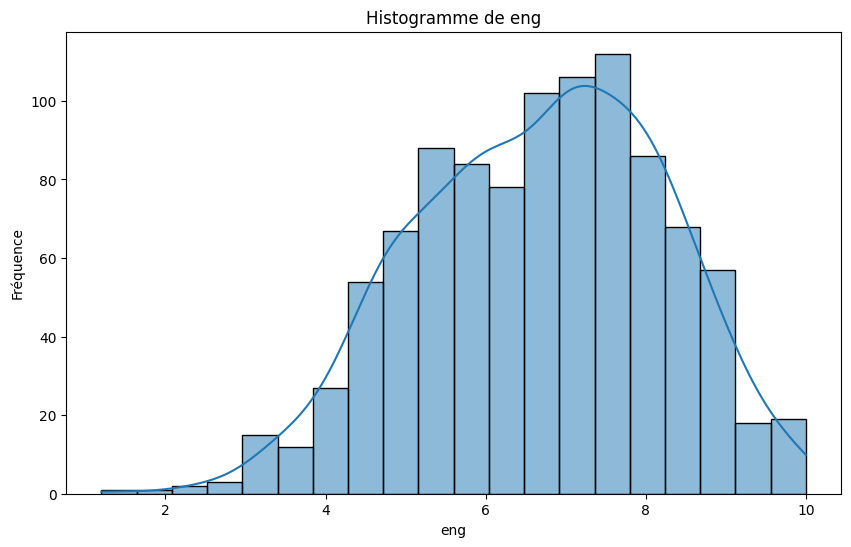

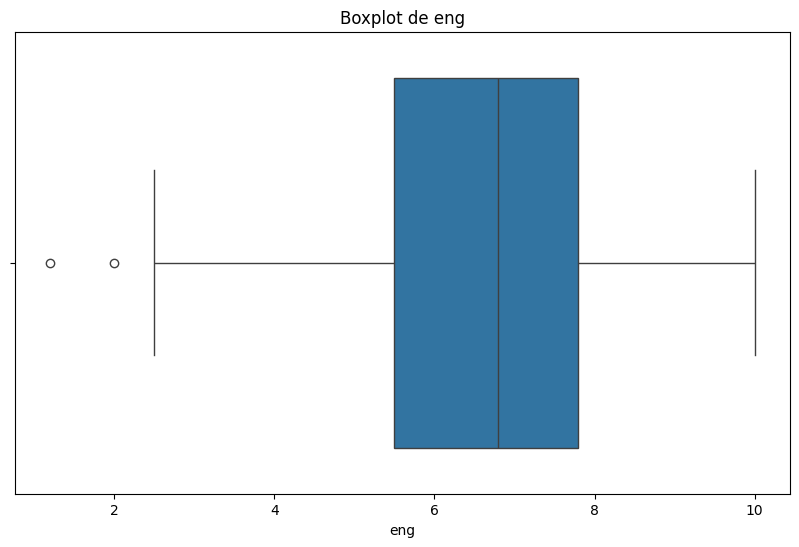

Colonne: group, Type: Qualitative Nominale
  Mode: lang
  Effectifs:
group
lang       500
science    500
Name: count, dtype: int64
  Fréquences:
group
lang       0.5
science    0.5
Name: proportion, dtype: float64


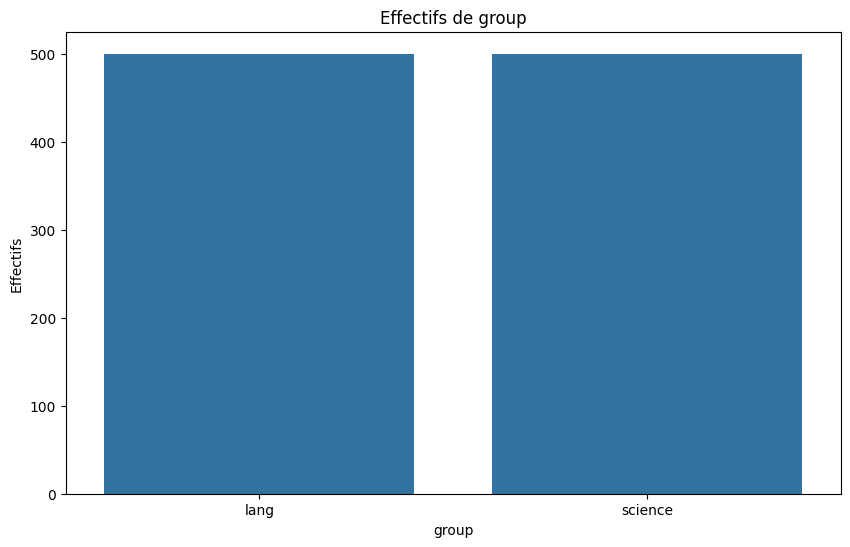

Colonne: gender, Type: Qualitative Nominale
  Mode: F
  Effectifs:
gender
F    516
M    484
Name: count, dtype: int64
  Fréquences:
gender
F    0.516
M    0.484
Name: proportion, dtype: float64


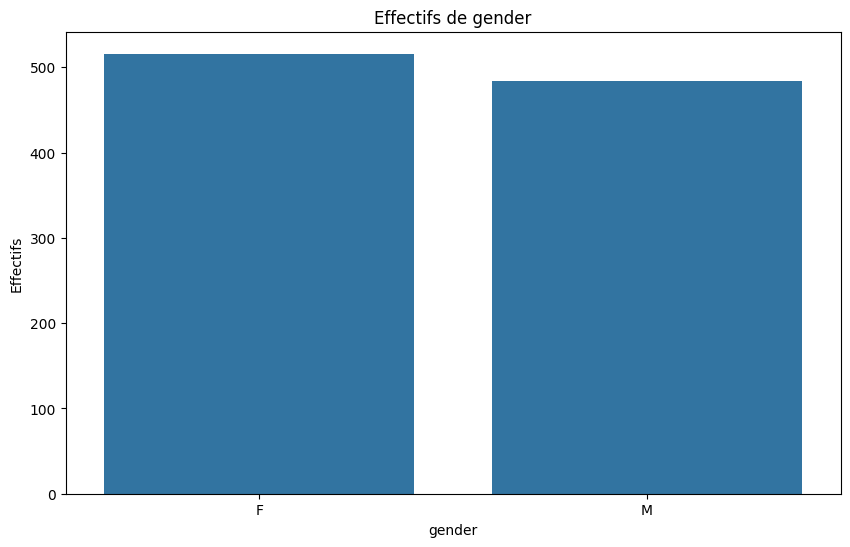


Corrélations de Pearson:
           index      math       eng
index  1.000000 -0.022312 -0.042836
math  -0.022312  1.000000 -0.339452
eng   -0.042836 -0.339452  1.000000


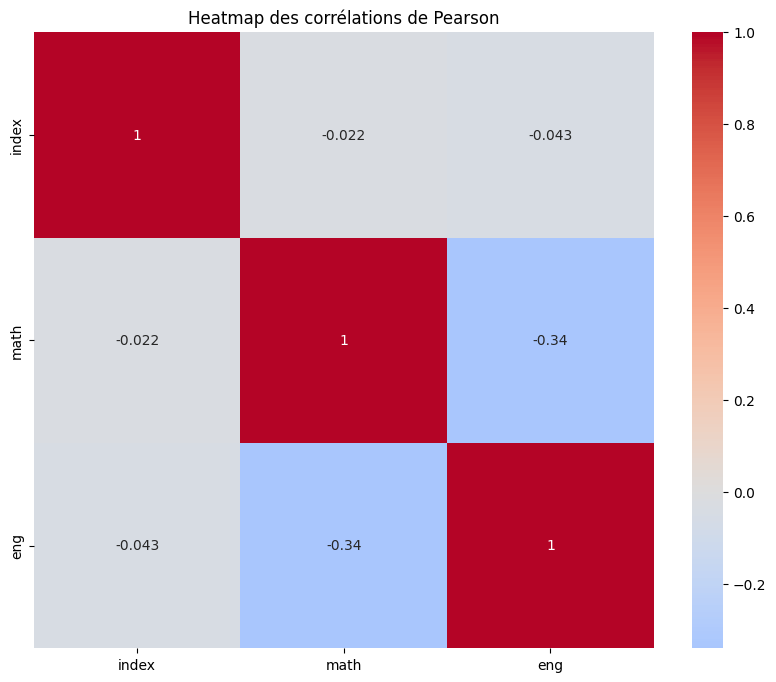


Fréquences conjointes entre group et gender:
 gender       F      M
group                
lang     0.307  0.193
science  0.209  0.291

Fréquences conditionnelles de group par rapport à gender:
 gender       F      M
group                
lang     0.614  0.386
science  0.418  0.582


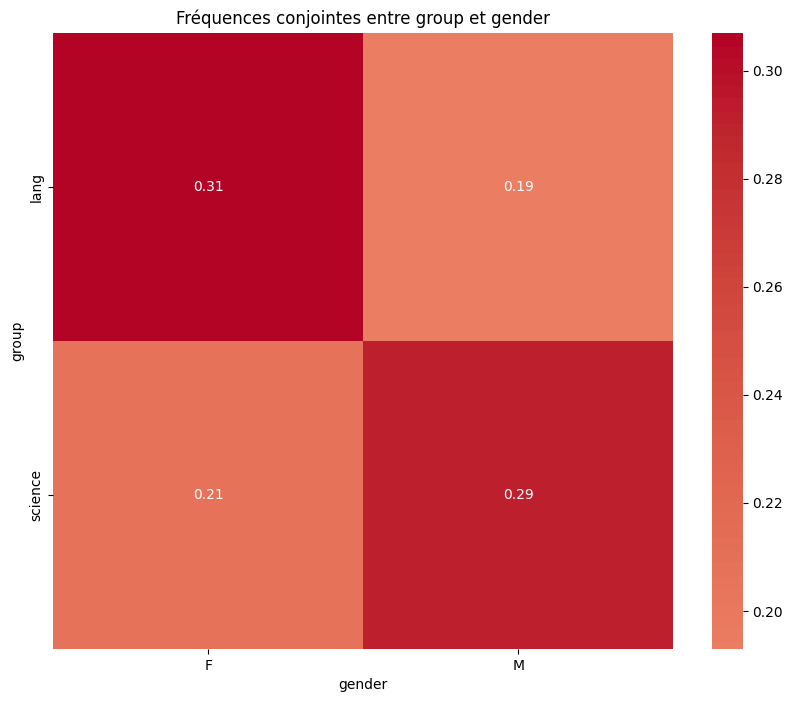

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def diagnostiquer_colonnes(df):
    diagnostics = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() < 20:
                type_col = "Quantitative Discrète"
            else:
                type_col = "Quantitative Continue"
            moyenne = df[col].mean()
            mediane = df[col].median()
            ecart_type = df[col].std()
            etendue = df[col].max() - df[col].min()
            diagnostics[col] = {
                "Type": type_col,
                "Moyenne": moyenne,
                "Médiane": mediane,
                "Écart-type": ecart_type,
                "Étendue": etendue,
            }
        else:
            if df[col].nunique() < 20:
                type_col = "Qualitative Nominale"
            else:
                type_col = "Qualitative Ordinale"
            mode = df[col].mode()[0]
            effectifs = df[col].value_counts()
            frequences = df[col].value_counts(normalize=True)
            diagnostics[col] = {
                "Type": type_col,
                "Mode": mode,
                "Effectifs": effectifs,
                "Fréquences": frequences,
            }
    return diagnostics


def calculer_correls(df):
    df_numerique = df.select_dtypes(include=["number"])
    correlations = df_numerique.corr(method="pearson")
    return correlations


def calculer_frequences_conjointes(df, col1, col2):
    table_conjointe = pd.crosstab(df[col1], df[col2])
    frequences_conjointes = table_conjointe / table_conjointe.sum().sum()
    return table_conjointe, frequences_conjointes


def calculer_frequences_conditionnelles(df, col1, col2):
    table_conjointe = pd.crosstab(df[col1], df[col2])
    frequences_conditionnelles = table_conjointe.div(
        table_conjointe.sum(axis=1), axis=0
    )
    return frequences_conditionnelles


def plot_histogram(df, col):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


def plot_boxplot(df, col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()


def plot_correlation_heatmap(correlations):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)
    plt.title("Heatmap des corrélations de Pearson")
    plt.show()


def plot_barplot(df, col):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f"Effectifs de {col}")
    plt.xlabel(col)
    plt.ylabel("Effectifs")
    plt.show()


def plot_frequences_conjointes_heatmap(frequences_conjointes, col1, col2):
    plt.figure(figsize=(10, 8))
    sns.heatmap(frequences_conjointes, annot=True, cmap="coolwarm", center=0)
    plt.title(f"Fréquences conjointes entre {col1} et {col2}")
    plt.show()


# Exemple d'utilisation
if __name__ == "__main__":
    # Charger les données depuis un fichier CSV
    df = pd.read_csv("./notes_v2.csv")

    # Diagnostiquer les colonnes
    resultats = diagnostiquer_colonnes(df)

    # Afficher les résultats
    for col, details in resultats.items():
        print(f"Colonne: {col}, Type: {details['Type']}")
        if "Moyenne" in details:
            print(f"  Moyenne: {details['Moyenne']}")
            print(f"  Médiane: {details['Médiane']}")
            print(f"  Écart-type: {details['Écart-type']}")
            print(f"  Étendue: {details['Étendue']}")
            plot_histogram(df, col)
            plot_boxplot(df, col)
        if "Mode" in details:
            print(f"  Mode: {details['Mode']}")
            print(f"  Effectifs:\n{details['Effectifs']}")
            print(f"  Fréquences:\n{details['Fréquences']}")
            plot_barplot(df, col)

    # Calculer et afficher les corrélations de Pearson
    correlations = calculer_correls(df)
    print("\nCorrélations de Pearson:\n", correlations)
    plot_correlation_heatmap(correlations)

    # Calculer et afficher les fréquences conjointes et conditionnelles pour les colonnes qualitatives
    colonnes_qualitatives = df.select_dtypes(include=["object"]).columns
    for i in range(len(colonnes_qualitatives)):
        for j in range(i + 1, len(colonnes_qualitatives)):
            col1 = colonnes_qualitatives[i]
            col2 = colonnes_qualitatives[j]
            table_conjointe, frequences_conjointes = calculer_frequences_conjointes(
                df, col1, col2
            )
            frequences_conditionnelles = calculer_frequences_conditionnelles(
                df, col1, col2
            )

            print(
                f"\nFréquences conjointes entre {col1} et {col2}:\n",
                frequences_conjointes,
            )
            print(
                f"\nFréquences conditionnelles de {col1} par rapport à {col2}:\n",
                frequences_conditionnelles,
            )
            plot_frequences_conjointes_heatmap(frequences_conjointes, col1, col2)

# Version Python traditionnel

In [21]:
import csv
from collections import defaultdict, Counter
from math import sqrt


def lire_csv(fichier):
    with open(fichier, newline="") as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row for row in reader]
    return data


def diagnostiquer_colonnes(data):
    diagnostics = {}
    colonnes = data[0].keys()
    for col in colonnes:
        valeurs = [row[col] for row in data]
        try:
            valeurs_num = [float(val) for val in valeurs]
            if len(set(valeurs_num)) < 20:
                type_col = "Quantitative Discrète"
            else:
                type_col = "Quantitative Continue"
            moyenne = sum(valeurs_num) / len(valeurs_num)
            mediane = sorted(valeurs_num)[len(valeurs_num) // 2]
            ecart_type = sqrt(
                sum((x - moyenne) ** 2 for x in valeurs_num) / len(valeurs_num)
            )
            etendue = max(valeurs_num) - min(valeurs_num)
            diagnostics[col] = {
                "Type": type_col,
                "Moyenne": moyenne,
                "Médiane": mediane,
                "Écart-type": ecart_type,
                "Étendue": etendue,
            }
        except ValueError:
            if len(set(valeurs)) < 20:
                type_col = "Qualitative Nominale"
            else:
                type_col = "Qualitative Ordinale"
            mode = Counter(valeurs).most_common(1)[0][0]
            effectifs = Counter(valeurs)
            frequences = {k: v / len(valeurs) for k, v in effectifs.items()}
            diagnostics[col] = {
                "Type": type_col,
                "Mode": mode,
                "Effectifs": effectifs,
                "Fréquences": frequences,
            }
    return diagnostics


def calculer_correls(data):
    colonnes = data[0].keys()
    numeriques = {
        col: [float(row[col]) for row in data]
        for col in colonnes
        if all(row[col].replace(".", "", 1).isdigit() for row in data)
    }
    correlations = {}
    for col1 in numeriques:
        for col2 in numeriques:
            if col1 != col2:
                x = numeriques[col1]
                y = numeriques[col2]
                moyenne_x = sum(x) / len(x)
                moyenne_y = sum(y) / len(y)
                covariance = sum(
                    (xi - moyenne_x) * (yi - moyenne_y) for xi, yi in zip(x, y)
                ) / len(x)
                ecart_type_x = sqrt(sum((xi - moyenne_x) ** 2 for xi in x) / len(x))
                ecart_type_y = sqrt(sum((yi - moyenne_y) ** 2 for yi in y) / len(y))
                correlation = covariance / (ecart_type_x * ecart_type_y)
                correlations[(col1, col2)] = correlation
    return correlations


def calculer_frequences_conjointes(data, col1, col2):
    table_conjointe = defaultdict(Counter)
    for row in data:
        table_conjointe[row[col1]][row[col2]] += 1
    total = len(data)
    frequences_conjointes = {
        k: {k2: v2 / total for k2, v2 in v.items()} for k, v in table_conjointe.items()
    }
    return table_conjointe, frequences_conjointes


def calculer_frequences_conditionnelles(data, col1, col2):
    table_conjointe = defaultdict(Counter)
    for row in data:
        table_conjointe[row[col1]][row[col2]] += 1
    frequences_conditionnelles = {
        k: {k2: v2 / sum(v.values()) for k2, v2 in v.items()}
        for k, v in table_conjointe.items()
    }
    return frequences_conditionnelles


# Exemple d'utilisation
if __name__ == "__main__":
    # Charger les données depuis un fichier CSV
    data = lire_csv("./notes_v2.csv")

    # Diagnostiquer les colonnes
    resultats = diagnostiquer_colonnes(data)

    # Afficher les résultats
    for col, details in resultats.items():
        print(f"Colonne: {col}, Type: {details['Type']}")
        if "Moyenne" in details:
            print(f"  Moyenne: {details['Moyenne']}")
            print(f"  Médiane: {details['Médiane']}")
            print(f"  Écart-type: {details['Écart-type']}")
            print(f"  Étendue: {details['Étendue']}")
        if "Mode" in details:
            print(f"  Mode: {details['Mode']}")
            print(f"  Effectifs:\n{details['Effectifs']}")
            print(f"  Fréquences:\n{details['Fréquences']}")

    # Calculer et afficher les corrélations de Pearson
    correlations = calculer_correls(data)
    print("\nCorrélations de Pearson:\n", correlations)

    # Calculer et afficher les fréquences conjointes et conditionnelles pour les colonnes qualitatives
    colonnes_qualitatives = [
        col
        for col in data[0].keys()
        if not all(row[col].replace(".", "", 1).isdigit() for row in data)
    ]
    for i in range(len(colonnes_qualitatives)):
        for j in range(i + 1, len(colonnes_qualitatives)):
            col1 = colonnes_qualitatives[i]
            col2 = colonnes_qualitatives[j]
            table_conjointe, frequences_conjointes = calculer_frequences_conjointes(
                data, col1, col2
            )
            frequences_conditionnelles = calculer_frequences_conditionnelles(
                data, col1, col2
            )

            print(
                f"\nFréquences conjointes entre {col1} et {col2}:\n",
                frequences_conjointes,
            )
            print(
                f"\nFréquences conditionnelles de {col1} par rapport à {col2}:\n",
                frequences_conditionnelles,
            )

Colonne: index, Type: Quantitative Continue
  Moyenne: 499.5
  Médiane: 500.0
  Écart-type: 288.6749902572095
  Étendue: 999.0
Colonne: math, Type: Quantitative Continue
  Moyenne: 6.54
  Médiane: 6.4
  Écart-type: 1.4738249556850365
  Étendue: 7.7
Colonne: eng, Type: Quantitative Continue
  Moyenne: 6.6724
  Médiane: 6.8
  Écart-type: 1.5368923970141826
  Étendue: 8.8
Colonne: group, Type: Qualitative Nominale
  Mode: lang
  Effectifs:
Counter({'lang': 500, 'science': 500})
  Fréquences:
{'lang': 0.5, 'science': 0.5}
Colonne: gender, Type: Qualitative Nominale
  Mode: F
  Effectifs:
Counter({'F': 516, 'M': 484})
  Fréquences:
{'F': 0.516, 'M': 0.484}

Corrélations de Pearson:
 {('index', 'math'): -0.02231180420512339, ('index', 'eng'): -0.04283640014805869, ('math', 'index'): -0.02231180420512339, ('math', 'eng'): -0.33945189185898084, ('eng', 'index'): -0.04283640014805869, ('eng', 'math'): -0.33945189185898084}

Fréquences conjointes entre group et gender:
 {'lang': {'F': 0.307, 'M'